# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3  AC 209 : From MLE to AIC


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [19]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import t
from scipy.optimize import minimize

from statsmodels.api import OLS
import statsmodels.api as sm
from scipy.stats import norm
%matplotlib inline


<div class='exercise'> <b>  Question 7: Student's t MLE </b> </div>

**7.1** Fit a simple linear regression model using Maximum Likelihood Estimation on the data provided in `data/beerdata.csv`.  Consider two statistical models the for noise: a) Normal and b) Student's $\textit{t}$-distribution with $\nu=5$ and scale factor $\sigma=\sqrt{3/5}$.  

**7.2** Compare the two models performances (visualize the prediction lines and estimate the KL divergence between the data and each model) and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal.

**Hints:**
1. Use the probability density function for the Student's t distribution  with location $t$,  $\nu$ degrees of freedom and scale factor $\sigma$.
2. If the MLE regression coefficients cannot be derived analytically consider numerical methods.
3. For _convenience_, you can use sklearn or statsmodel for the Normal case.


### Answers

**7.1 Fit a simple linear regression model using Maximum Likelihood Estimation on the data provided in `data/beerdata.csv`.  Consider two statistical models the for noise: a) Normal and b) Student's $\textit{t}$-distribution with $\nu=5$ and scale factor $\sigma=\sqrt{3/5}$.   **

*your answer here*


In [21]:
df = pd.read_csv('data/beerdata.csv', sep=",")
display(df.head())


,Unnamed: 0,x,y
0,0,0.760083,9.616565
1,1,0.766794,8.652492
2,2,0.504173,7.653462
3,3,0.357411,7.984081
4,4,0.730932,9.080448


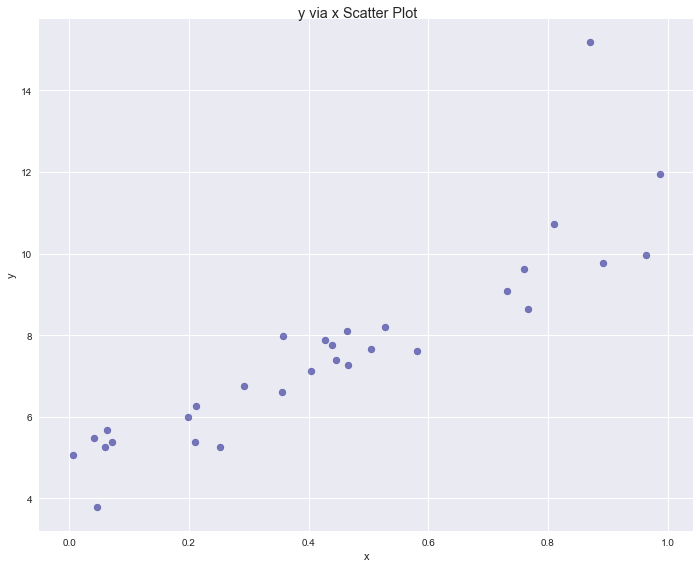

In [35]:
#### Plot the data
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df.x, df.y, alpha=0.5, color='navy')
fig.suptitle('y via x Scatter Plot')
fig.tight_layout(pad=2);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

In [27]:
#### Generate the ordinary least squares model (OLS)
model = sm.OLS(
    df.y,
    sm.add_constant(df['x'])
).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     108.7
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           3.78e-11
Time:                        17:05:59   Log-Likelihood:                -43.960
No. Observations:                  30   AIC:                             91.92
Df Residuals:                      28   BIC:                             94.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5309      0.357     12.697      0.000       3.800       5.262
x              7.0341      0.675     10.428      0.000       5.652       8.416
==============================================================================
Omnibus:                       37.057   Durbin-Watson:                   2.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.520
Skew:                           2.451   Prob(JB):                     7.50e-29
Kurtosis:                      11.921   Cond. No.                         4.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

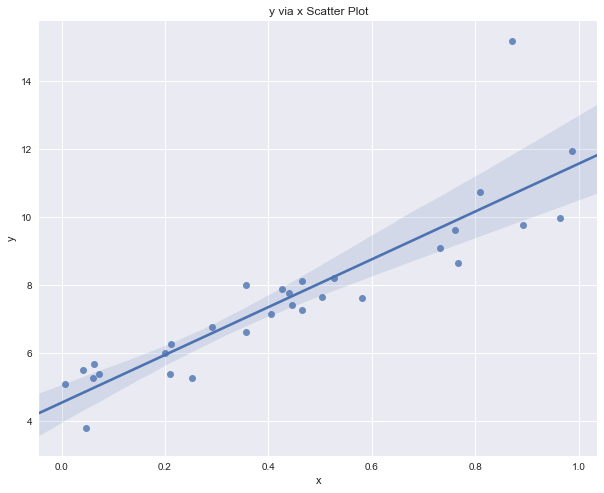

In [34]:
#### Plot the data along with OLS fit line
fig = plt.subplots(figsize=(10,8));
ax = sns.regplot(x='x', y='y', data=df);
ax.set_title('y via x Scatter Plot');
ax.set_xlabel('x');
ax.set_ylabel('y');

In [7]:
#### LET'S MAKE THE REGRESSION MODEL WITH t-Students distribution
# your code here


In [8]:
# your code here


In [9]:

# your code here


**7.2 Compare the two models performances (visualize the prediction lines and estimate the KL divergence between the data and each model) and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal. **


*your answer here*


In [10]:
# your code here


*your answer here*



<div class='exercise'> <b>  Question 8: Akaike Information Criterion (AIC) </b> </div>

Perform a simple numerical experiment to understand and demonstrate the AIC by using the given `generate_data` function to generate your data.
 

**8.1**
Generate data for different number of parameters $k$, in the range 1 to 10. For each of the six models generate 1000 training and 1000 testing datasets with each one containing $n=50$ observations.

**8.2** 
Use the training set to estimate the OLS coefficients and  calculate the predicted values, $\hat y_{tr}$, on the training set and the log-likelihood. 
 Use the OLS coefficients to calculate the predicted values  for the testing set, $\hat y_{te}$, and the associated log-likelihood. 

**8.3** 
For each $k$ compute the average and standard deviation of the log-likelihoods across the 1000 simulations.  Plot the average  log-likelihoods (with error bars) and the average AIC as function of $k$, the number of parameters. What is the best $k$ based on AIC?

**8.4**
Verify the results in 8.3 by plotting the average log-likelihoods for each of the training and testing datasets as a function of $k$. What is the best $k$ based on this plot?


**Comment:**
1. The function "generate_data" uses an interesting trick to generate data directly using the regression coefficients as proxies for the correlations with the response variable. It generates data from a Normal distribution, hence $y_i \sim \mathcal{N}(\mu_i= 0.15 x_{1,i} - 0.4 x_{2,i},\sigma^2=1)$.

In [11]:
def generate_data(N,k,beta=[0.15 , -0.4]):
    
    ## N: The number of observations
    ## k: The number of parameters
    ## beta is the weights vector for the covariates x1, x2
    ##
    ## Make d_min be greater or equal to k
    n_dim = 1+len(beta)
    if (n_dim <= k):
        n_dim = k

    Rho = np.eye(n_dim)
    
    # Add beta in the first row or Rho
    for i,r in enumerate(beta):
        Rho[0,i+1] = r
    
    index_lower = np.tril_indices(n_dim, -1)
    
    Rho[index_lower] = Rho.T[index_lower]
    mean = n_dim * [0.]        
    Xtrain = np.random.multivariate_normal(mean, Rho, size=N)
    Xtest = np.random.multivariate_normal(mean, Rho, size=N)
    ytrain = Xtrain[:,0].copy()
    Xtrain[:,0]=1.
    ytest = Xtest[:,0].copy()
    Xtest[:,0]=1.
    return Xtrain[:,:k], ytrain, Xtest[:,:k], ytest

### Answers

**8.1 Generate data for different number of parameters $k$, in the range 1 to 10. For each of the six models generate 1000 training and 1000 testing datasets with each one containing $n=50$ observations. **


In [12]:
#### Be familiar with the generated data by printing them:
# your code here


**8.2 Use the training set to estimate the OLS coefficients and  calculate the predicted values, $\hat y_{tr}$, on the training set and the log-likelihood. 
 Use the OLS coefficients to calculate the predicted values  for the testing set, $\hat y_{te}$, and the associated log-likelihood. **


In [13]:
#### Generate the datasets:
# your code here


**8.3
For each $k$ compute the average and standard deviation of the log-likelihoods across the 2000 simulations.  Plot the average  log-likelihoods (with error bars) and the average AIC as function of $k$, the number of parameters. What is the best $k$ based on AIC?**

In [14]:
# your code here


In [15]:
#### Plot the log-likelihood for the traing and testing:
# your code here



**8.4
Verify the results in 8.3 by plotting the average log-likelihoods for each of the training and testing datasets as a function of $k$. What is the best $k$ based on this plot?
**


In [16]:
#### Plot the log-likelihood for the traing and testing:
# your code here
